In [11]:
from ashlar import filepattern, reg 
import os

In [3]:
path = "C:\\Users\\chloe\\wolkovich_s24\\TreeRings\\code\\tiff_test"
pattern = "frame_{row:01}_{col:01}_1.tiff" 
overlap = 0.20
pixel_size = 1.55

In [4]:

        # self.metadata = FilePatternMetadata(path, pattern, overlap, pixel_size) #dont need bc reader defines its own metadata object?
reader = filepattern.FilePatternReader(path, pattern, overlap, pixel_size) #in ashlar/filepattern.py pix_sz =1??
edge_aligner = reg.EdgeAligner(reader,verbose=True)
layer_aligner = reg.LayerAligner(reader, edge_aligner) #idk what reference_aligner is?? --- update - its edge aligner in ashlar.py?
mosaics = []
mosaic_args = {}
mosaic_args['channels'] = range(3)
mosaic_args['verbose'] = True

In [5]:
edge_aligner.run()

    assembling thumbnail 21/21
    quantifying alignment error 1000/1000
    aligning edge 20/20


C:\Users\chloe\anaconda3\envs\ashlar\lib\site-packages\ashlar\reg.py:1368: DataWarning: Could not align enough edges, proceeding anyway with original stage positions.
  warnings.warn(message, DataWarning)


In [6]:
mosaics.append(reg.Mosaic(edge_aligner, edge_aligner.mosaic_shape, **mosaic_args))

range(0, 3)


In [7]:
layer_aligner.run()
mosaics.append(reg.Mosaic(layer_aligner, edge_aligner.mosaic_shape, **mosaic_args))

    assembling thumbnail 21/21
    estimated cycle offset [y x] = [0. 0.]
range(0, 3)


In [11]:
writer_class = reg.PyramidWriter
writer = writer_class(mosaics, "out_tiff_channel2.ome.tiff", verbose=True)
writer.run()

Cycle 0:
    Channel 0:
        merging tile 21/21
    Channel 1:
        merging tile 21/21
    Channel 2:
        merging tile 21/21
Cycle 1:
    Channel 0:
        merging tile 21/21
    Channel 1:
        merging tile 21/21
    Channel 2:
        merging tile 21/21
Generating pyramid
    Level 1 (32640 x 1080)
        processing channel 6/6
    Level 2 (16320 x 540)
        processing channel 6/6
    Level 3 (8160 x 270)
        processing channel 6/6
    Level 4 (4080 x 135)
        processing channel 6/6
    Level 5 (2040 x 68)
        processing channel 6/6
    Level 6 (1020 x 34)
        processing channel 6/6


In [2]:
from ashlar import filepattern, thumbnail, reg
import matplotlib.pyplot as plt
from ashlar.scripts.ashlar import process_axis_flip

In [4]:
c1r = filepattern.FilePatternReader(path, pattern, overlap, pixel_size) #in ashlar/filepattern.py pix_sz =1??

In [5]:
c1e = reg.EdgeAligner(c1r, filter_sigma=1, verbose=True)
c1e.run()

    assembling thumbnail 42/42
    quantifying alignment error 1000/1000
    aligning edge 61/61


C:\Users\chloe\anaconda3\envs\ashlar\lib\site-packages\ashlar\reg.py:1367: DataWarning: Could not align enough edges, proceeding anyway with original stage positions.
  warnings.warn(message, DataWarning)


    assembling thumbnail 42/42
    quantifying alignment error 1000/1000
    aligning edge 61/61


C:\Users\chloe\anaconda3\envs\ashlar\lib\site-packages\ashlar\reg.py:1367: DataWarning: Could not align enough edges, proceeding anyway with original stage positions.
  warnings.warn(message, DataWarning)
C:\Users\chloe\anaconda3\envs\ashlar\lib\site-packages\ashlar\reg.py:1469: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
C:\Users\chloe\anaconda3\envs\ashlar\lib\site-packages\ashlar\reg.py:1472: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).



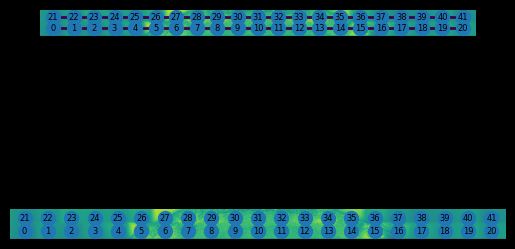

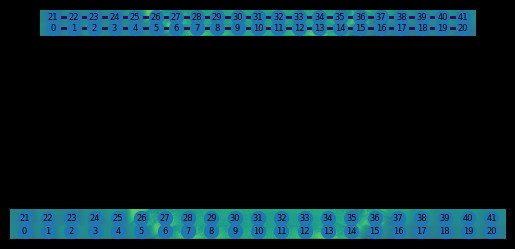

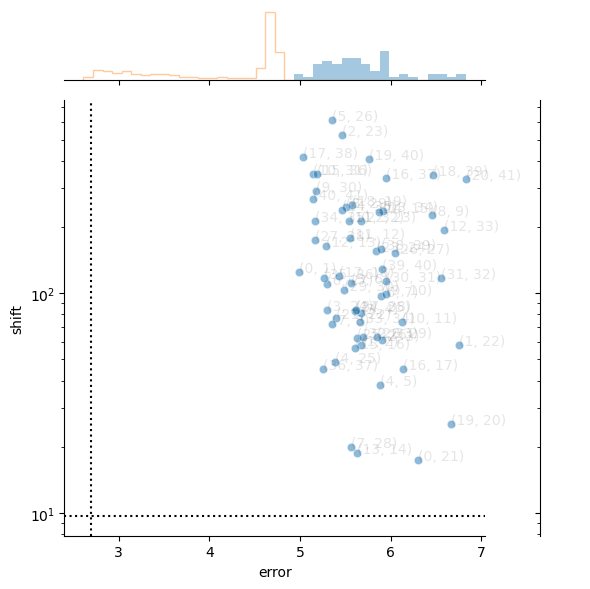

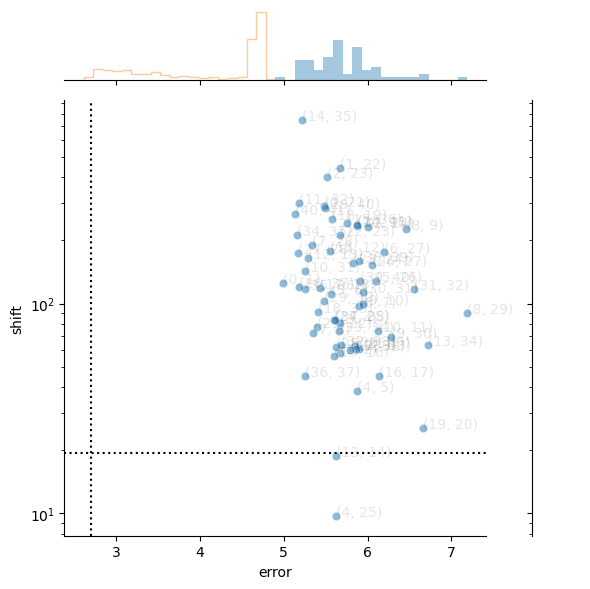

In [6]:
process_axis_flip(c1r, flip_x=False, flip_y=True)

reg.plot_edge_quality(c1e, img=c1e.reader.thumbnail)
#plt.gca().subtitle('c1e')


c1e_m = reg.EdgeAligner(c1r, filter_sigma=1, max_shift=30, verbose=True)
c1e_m.run()
reg.plot_edge_quality(c1e_m, img=c1e_m.reader.thumbnail)
#plt.gca().subtitle('c1e_m')

# plot_edge_scatter function requires seaborn
reg.plot_edge_scatter(c1e)
#plt.gca().subtitle('c1e')

reg.plot_edge_scatter(c1e_m)
#plt.gca().subtitle('c1e_m')